In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import synapseclient as sc

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['arial']
# matplotlib.rcParams['font.size'] = 6

sns.set_theme(
    context ='paper',
    palette="Paired", 
    style='white',
    font='arial',
    # font_scale=1.0
)

## Gobal proteomics

In [3]:
# dec only
syn = sc.login()

dec_only_global_id = syn.get('syn61910980').path#'exp23_global_raw_intensity_crosstab.txt'
dec_meta_id = syn.get('syn61910982').path#'exp23_global_raw_metadata.txt'

dec_only_meta = pd.read_csv(dec_meta_id, delimiter='\t')
do_table = pd.read_csv(dec_only_global_id, delimiter='\t')

Welcome, Sara Gosline!



In [4]:
dec_only_meta

,plex_channel,sample_name,ID
sample_1,1 127N,L6_sample_1,sample_1
sample_2,1 133C,L7_sample_2,sample_2
sample_3,1 130N,L8_sample_3,sample_3
sample_4,1 128C,LR9_sample_4,sample_4
sample_5,1 129N,L11_sample_5,sample_5
sample_6,1 133N,L12_sample_6,sample_6
sample_7,1 131N,molm/dec #1_sample_7,sample_7
sample_8,1 132N,molm/dec #2_sample_8,sample_8
sample_9,1 126,molm/dec #3_sample_9,sample_9
sample_10,1 131C,molm/dec #4_sample_10,sample_10


In [5]:

# gv, gvd, gd samples
exp_18_meta_id = syn.get('syn60204362').path#'exp18_global_raw_metadata 1.txt'
exp_18_id = syn.get('syn60204361').path#'exp18_global_raw_intensity_crosstab 1.txt'

exp_18_meta = pd.read_csv(exp_18_meta_id, delimiter='\t')
exp_18 = pd.read_csv(exp_18_id, delimiter='\t')
exp_18.shape

(8621, 48)

In [6]:
exp_18_meta['TS_'] = exp_18_meta.Treatment + '_' +exp_18_meta.State + '-'+ exp_18_meta.Plex.astype(str)
# make a dictionary to rename columns of table to be the same as meta
exp_18_meta.reset_index(names='name_index',inplace=True)
exp_18_meta.dropna(subset=['Ligand'], inplace=True)
col_dict = exp_18_meta[['name_index', 'TS_']].set_index('name_index').to_dict()['TS_']

exp_18 = exp_18[col_dict.keys()]
exp_18.rename(columns=col_dict, inplace=True)

In [7]:
exp_18.head()

,GV_Early-1,none_Parental-1,G_Late-1,GVD_Late-1,GVD_Early-1,GV_Late-1,GVD_Late-1,none_Parental-1,none_Parental-1,GVD_Early-1,...,none_Parental-3,GVD_Late-3,GVD_Late-3,GVD_Early-3,G_Early-3,GD_Late-3,GV_Late-3,GVD_Early-3,GD_Early-3,GD_Late-3
AAAS,0.301105,0.385598,0.349695,0.340615,0.365000,0.236136,0.285727,0.333286,0.273240,0.333186,...,0.381413,0.222365,0.184779,0.280876,0.642288,0.185254,0.327976,0.503425,0.433726,0.428604
STIP1,2.306759,2.209775,1.535724,2.297267,2.232269,2.214855,2.334541,2.192086,2.219465,2.084073,...,2.403771,2.070321,2.171021,2.266546,2.384754,2.239297,2.140539,2.619641,2.499166,2.262125
EEF1D,0.641532,0.893367,1.197497,1.177205,1.014867,0.761742,1.058623,0.841227,0.959780,0.931927,...,2.168536,2.341077,2.349807,1.880634,2.315452,2.487107,2.153465,2.199339,2.204363,2.011975
DIS3L,-0.338850,-0.334735,-0.451620,-0.398674,-0.549312,-0.260588,-0.638451,-0.294714,-0.362666,-0.407136,...,-0.360348,-0.591669,-0.618825,-0.654617,-0.239381,-0.914971,-0.338585,-0.457852,-0.394204,-0.380296
COPS3,0.088440,0.015495,0.036622,0.164228,0.118053,0.131087,0.093202,0.156738,0.140178,0.097856,...,0.044036,0.218561,0.166517,0.080540,-0.105407,0.260262,0.063193,0.305303,0.204600,0.247800


In [8]:
# median center the data
exp_18_for_plot = exp_18.copy()
exp_18_for_plot.columns = [f'{i}_{j}' for i,j in enumerate(exp_18.columns)]

exp_18_for_plot -= exp_18_for_plot.median()

In [9]:
exp_18_for_plot

,0_GV_Early-1,1_none_Parental-1,2_G_Late-1,3_GVD_Late-1,4_GVD_Early-1,5_GV_Late-1,6_GVD_Late-1,7_none_Parental-1,8_none_Parental-1,9_GVD_Early-1,...,33_none_Parental-3,34_GVD_Late-3,35_GVD_Late-3,36_GVD_Early-3,37_G_Early-3,38_GD_Late-3,39_GV_Late-3,40_GVD_Early-3,41_GD_Early-3,42_GD_Late-3
AAAS,0.258387,0.363596,0.332732,0.317158,0.322453,0.195741,0.243930,0.301738,0.247540,0.315016,...,0.347285,0.199882,0.126531,0.239573,0.612957,0.154099,0.275423,0.475953,0.394848,0.391378
STIP1,2.264041,2.187774,1.518761,2.273810,2.189722,2.174460,2.292744,2.160538,2.193765,2.065903,...,2.369644,2.047838,2.112773,2.225242,2.355423,2.208142,2.087986,2.592169,2.460288,2.224899
EEF1D,0.598815,0.871365,1.180534,1.153747,0.972321,0.721347,1.016826,0.809678,0.934080,0.913757,...,2.134408,2.318594,2.291558,1.839331,2.286121,2.455952,2.100912,2.171867,2.165485,1.974749
DIS3L,-0.381568,-0.356736,-0.468583,-0.422131,-0.591859,-0.300984,-0.680248,-0.326262,-0.388365,-0.425306,...,-0.394475,-0.614152,-0.677073,-0.695920,-0.268712,-0.946126,-0.391138,-0.485324,-0.433082,-0.417522
COPS3,0.045722,-0.006506,0.019659,0.140771,0.075506,0.090691,0.051405,0.125190,0.114478,0.079686,...,0.009909,0.196078,0.108269,0.039237,-0.134738,0.229107,0.010640,0.277831,0.165723,0.210574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTNNA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.403924,-0.191583,-0.281894,-0.183819,-0.029926,-0.539690,-0.099316,0.348741,0.417316,0.082073
ZNF177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.515979,-1.278714,-1.498870,-1.455321,-1.189891,-1.299122,-1.405645,-1.371458,-1.499459,-1.556518
C17orf100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.409142,-2.216294,-1.642703,-1.315373,-1.155602,-2.301189,-1.773684,-1.797910,-1.845092,-1.814872
SMIM27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.139019,-2.244538,-3.059020,-2.790872,-1.982361,-2.599902,-3.012928,-2.867137,-2.581813,-2.602228


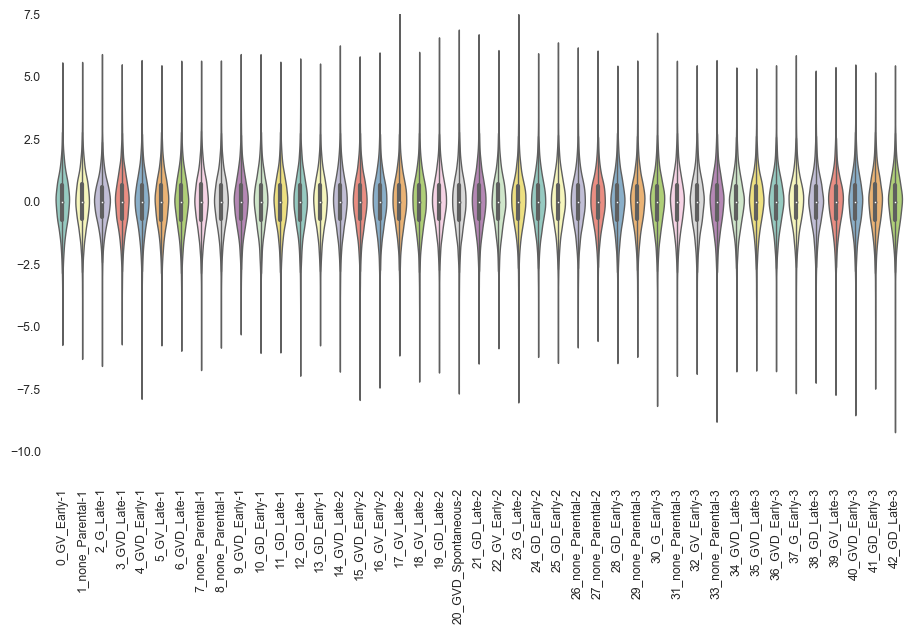

In [10]:
f, ax = plt.subplots(figsize=(11, 6))
g = sns.violinplot(data=exp_18_for_plot, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-11., 7.5))
ax.xaxis.set_tick_params(rotation=90)
sns.despine(left=True, bottom=True)

In [11]:
dec_only_meta.reset_index(names='name_index',inplace=True)

dec_only_meta.loc[dec_only_meta.sample_name.str.startswith('L'), 'TS_'] = 'GD_late'
dec_only_meta.loc[dec_only_meta.sample_name.str.startswith('molm14'), 'TS_'] = 'none_Parental'
dec_only_meta.loc[dec_only_meta.sample_name.str.startswith('molm/dec'), 'TS_'] = 'D_only'


do_table=do_table[[f'sample_{i}' for i in range(1,17)]]
col_dict2 = dec_only_meta[['name_index', 'TS_']].set_index('name_index').to_dict()['TS_']
do_table.rename(columns=col_dict2, inplace=True)

In [12]:
do_table

,GD_late,GD_late,GD_late,GD_late,GD_late,GD_late,D_only,D_only,D_only,D_only,D_only,D_only,D_only,none_Parental,none_Parental,none_Parental
A2M,-1.902501,-1.674869,-2.326526,-2.373076,-3.418624,-2.163333,4.414660,2.932578,2.702848,2.929027,1.927123,4.245226,3.952665,3.425759,3.495401,2.240766
SUDS3,0.823049,0.341335,0.365874,0.391389,0.332553,0.223815,0.852251,0.088762,0.354415,0.590696,0.439528,0.426673,0.245761,0.854776,0.231692,0.348393
SESN2,-1.373135,-0.120213,-0.915321,-0.556541,-0.116649,-0.986645,-1.363204,-0.478043,-0.705407,-0.960664,-0.211986,-0.355482,-1.109943,-1.475162,-0.952748,-1.143334
RBM12B,0.721032,0.680069,0.872553,0.693731,0.727789,0.794044,1.976388,1.737101,1.064652,1.232011,1.200228,1.325862,1.096758,1.832611,1.141739,1.206004
PMF1,1.508028,0.821885,1.041681,1.028062,1.042357,0.926021,1.300895,0.720832,0.711288,0.755722,0.913912,0.909206,0.584894,1.301618,0.653176,0.824558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF780A,-0.323693,-0.002017,0.125733,-0.006963,-0.280766,0.214406,0.348358,0.377580,0.145368,0.147883,-0.381837,0.262171,0.147174,0.116434,0.402710,0.655767
ZNF776,0.384936,0.452602,0.442165,0.454505,0.472135,0.282887,0.001613,-0.538743,0.053394,-0.355567,0.264030,0.152908,-0.373919,0.167208,0.239949,0.198798
ZNF785,-4.919516,-4.709825,-4.625799,-4.968562,-4.682839,-5.487026,-3.391872,-3.429325,-4.313742,-4.054104,-3.891888,-3.805563,-3.820614,-3.615385,-3.444879,-3.828935
ZNF784,-3.155017,-3.472696,-3.288301,-2.978966,-3.372745,-3.205938,-4.047379,-2.521084,-3.305216,-3.258511,-3.264337,-3.477258,-3.384260,-3.543445,-3.185376,-3.406551


In [13]:
do_table_for_plot = do_table.copy()
do_table_for_plot.columns = [f'00{i}_{j}-4' for i,j in enumerate(do_table.columns)]
do_table_for_plot -= do_table_for_plot.median()


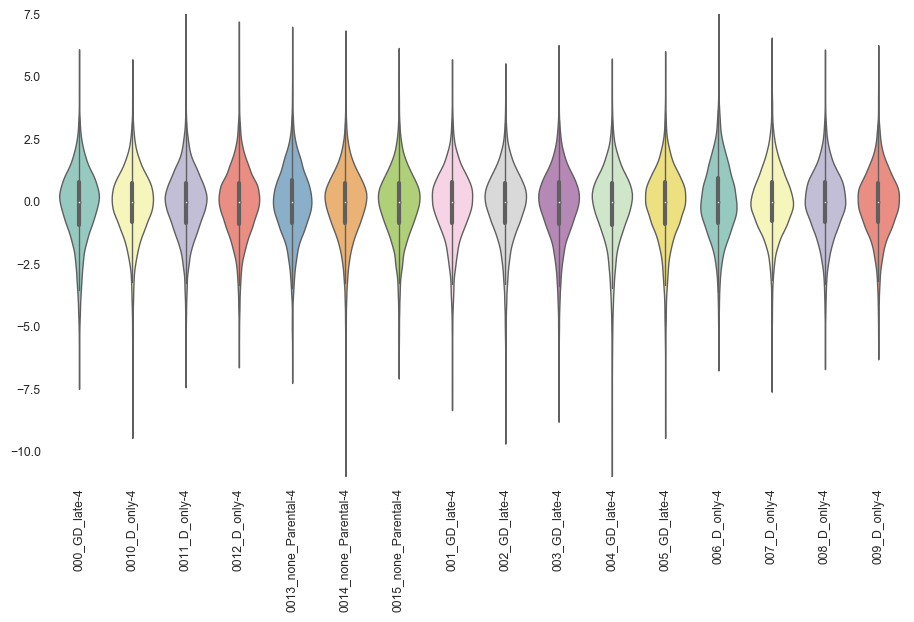

In [14]:
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=do_table_for_plot, bw_adjust=.5, cut=1, linewidth=1, palette="Set3",
               order =sorted(do_table_for_plot.columns) )

# Finalize the figure
ax.set(ylim=(-11., 7.5))
ax.xaxis.set_tick_params(rotation=90)
sns.despine(left=True, bottom=True)

In [15]:
merged = pd.concat([do_table_for_plot, exp_18_for_plot ], axis=1)
merged = merged[[i for i in merged.columns if not 'Spontaneous' in i]]
##remove GV and GVD for third paper
merged = merged[[i for i in merged.columns if 'GV' not in i]]
merged.head()

,000_GD_late-4,001_GD_late-4,002_GD_late-4,003_GD_late-4,004_GD_late-4,005_GD_late-4,006_D_only-4,007_D_only-4,008_D_only-4,009_D_only-4,...,27_none_Parental-2,28_GD_Early-3,29_none_Parental-3,30_G_Early-3,31_none_Parental-3,33_none_Parental-3,37_G_Early-3,38_GD_Late-3,41_GD_Early-3,42_GD_Late-3
A2M,-2.071516,-1.790378,-2.473373,-2.510041,-3.597566,-2.297355,4.435960,2.942328,2.648714,2.862647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUDS3,0.654034,0.225827,0.219027,0.254425,0.153611,0.089793,0.873550,0.098511,0.300280,0.524317,...,-0.068233,-0.222694,-0.141016,-0.116663,-0.146240,-0.202759,-0.193085,-0.279717,-0.202366,-0.154633
SESN2,-1.542150,-0.235722,-1.062168,-0.693506,-0.295591,-1.120667,-1.341904,-0.468293,-0.759542,-1.027044,...,-0.398832,-0.736175,-0.209123,-0.617035,-0.161478,-0.291795,-0.761404,-0.957208,-0.604188,-0.797816
RBM12B,0.552017,0.564560,0.725705,0.556766,0.548847,0.660022,1.997687,1.746850,1.010518,1.165631,...,0.478302,0.838704,0.743067,0.235341,0.715823,0.732308,0.283532,0.810969,0.762333,0.777379
PMF1,1.339013,0.706376,0.894833,0.891097,0.863414,0.791999,1.322194,0.730581,0.657154,0.689343,...,0.427891,-0.182549,-0.039276,0.074090,-0.017133,0.014979,-0.082588,-0.255438,-0.062868,-0.097135


In [16]:
merged.to_csv('merged_gd_data.csv')

In [17]:
merged_no_na = merged.fillna(0, axis=0)
merged_no_na -= merged_no_na.median()

In [18]:
styles_18 = pd.DataFrame()

styles_18['name'] = ['_'.join(i.split('_')[1:]) for i in exp_18_for_plot.columns if 'Spontaneous' not in i]
styles_18['name'] = [i.split('-')[0] for i in styles_18['name']]
styles_18['batch'] = [i.split('-')[1] for i in exp_18_for_plot.columns if "Spontaneous" not in i]
styles_18['state'] = [i.split('_')[-1] for i in styles_18['name']]
styles_18['drug'] = [i.split('_')[0] for i in styles_18['name']]
# styles['state'] = ['early' if 'Early' in i else 'late' for i in styles['name']]
styles_18.loc[styles_18.state == 'only', 'state'] = 'late'
styles_18.loc[styles_18.state == 'Early', 'state'] = 'early'
styles_18.loc[styles_18.state == 'Late', 'state'] = 'late'
styles_18.loc[styles_18.state == 'Parental', 'state'] = 'parental'
styles_18.loc[styles_18.name == 'Parental', 'state'] = 'parental'
styles_18.loc[styles_18.name == 'parental', 'drug'] = 'none'
styles_18.loc[len(do_table_for_plot.columns):, 'experiment'] = 'exp_18'
styles_18

,name,batch,state,drug,experiment
0,GV_Early,1,early,GV,NaN
1,none_Parental,1,parental,none,NaN
2,G_Late,1,late,G,NaN
3,GVD_Late,1,late,GVD,NaN
4,GVD_Early,1,early,GVD,NaN
5,GV_Late,1,late,GV,NaN
6,GVD_Late,1,late,GVD,NaN
7,none_Parental,1,parental,none,NaN
8,none_Parental,1,parental,none,NaN
9,GVD_Early,1,early,GVD,NaN


In [19]:
styles = pd.DataFrame()

styles['name'] = ['_'.join(i.split('_')[1:]) for i in merged.columns]
styles['name'] = [i.split('-')[0] for i in styles['name']]
styles.name = styles.name.str.replace('late', 'Late')
styles['batch'] = [i.split('-')[1] for i in merged.columns]
styles['state'] = [i.split('_')[-1] for i in styles['name']]
styles['drug'] = [i.split('_')[0] for i in styles['name']]
# styles['state'] = ['early' if 'Early' in i else 'late' for i in styles['name']]
styles.loc[styles.state == 'only', 'state'] = 'late'
styles.loc[styles.state == 'Early', 'state'] = 'early'
styles.loc[styles.state == 'Late', 'state'] = 'late'
styles.loc[styles.state == 'Parental', 'state'] = 'parental'
styles.loc[styles.name == 'Parental', 'state'] = 'parental'
styles.loc[styles.name == 'parental', 'drug'] = 'none'
styles.loc[:len(do_table_for_plot.columns), 'experiment'] = 'exp_23'
styles.loc[len(do_table_for_plot.columns):, 'experiment'] = 'exp_18'

# styles['batch'] = batch
# styles= styles.loc[styles.state=='Spontaneous']
styles.to_csv('meta.csv', index=False)
styles

,name,batch,state,drug,experiment
0,GD_Late,4,late,GD,exp_23
1,GD_Late,4,late,GD,exp_23
2,GD_Late,4,late,GD,exp_23
3,GD_Late,4,late,GD,exp_23
4,GD_Late,4,late,GD,exp_23
5,GD_Late,4,late,GD,exp_23
6,D_only,4,late,D,exp_23
7,D_only,4,late,D,exp_23
8,D_only,4,late,D,exp_23
9,D_only,4,late,D,exp_23


In [20]:
styles_18 = styles.loc[styles.experiment == 'exp_18']
dec_only_styles = styles.loc[styles.experiment == 'exp_23']

In [21]:

from combat import pycombat    

In [22]:
df_corrected_drug_mod = pycombat.pycombat(
    merged_no_na, 
    batch=list(styles.batch), 
    mod=list(styles.drug)
)

Found 4 batches.
Adjusting for 3 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


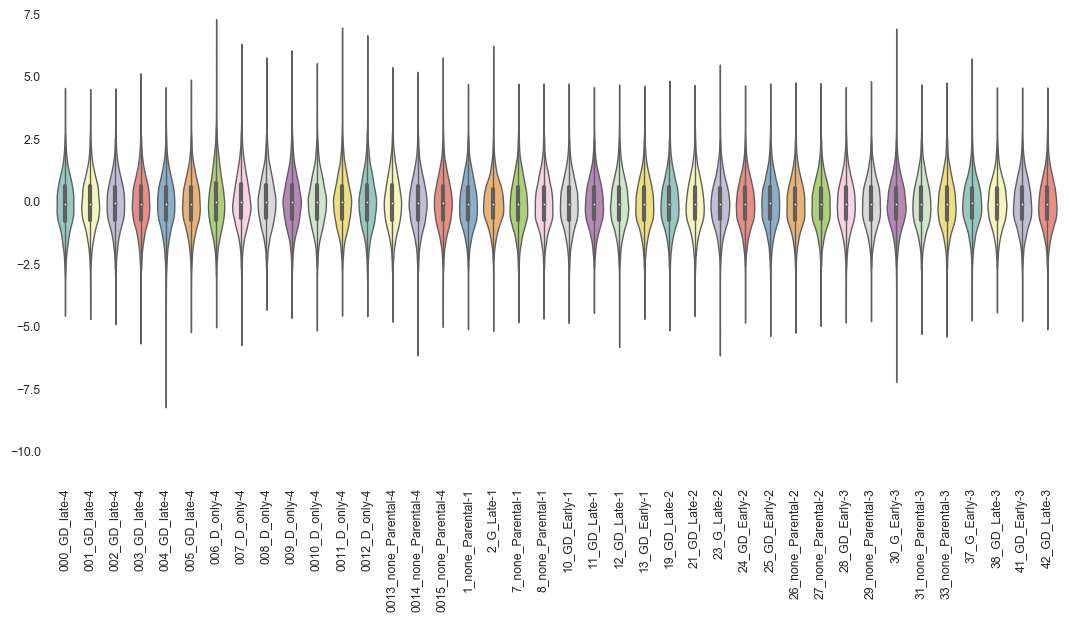

In [23]:
f, ax = plt.subplots(figsize=(13, 6))
sns.violinplot(data=df_corrected_drug_mod, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-11., 7.5))
ax.xaxis.set_tick_params(rotation=90)
sns.despine(left=True, bottom=True)
plt.savefig('violin_plot_median_centered.png', bbox_inches='tight')

In [24]:
df_corrected_no_mod = pycombat.pycombat(
    merged_no_na, list(styles.batch), 
)

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate



Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [25]:
exp_18_for_plot = exp_18_for_plot[[i for i in exp_18_for_plot.columns if 'Spontaneous' not in i]].fillna(0, axis=0)
exp_18_for_plot = exp_18_for_plot[[i for i in exp_18_for_plot.columns if 'GV' not in i]].fillna(0, axis=0)

exp_18_corrected = pycombat.pycombat(
    exp_18_for_plot,
    batch=list(styles_18.batch),
    mod=list(styles_18.drug)
)

Found 3 batches.
Adjusting for 2 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [26]:
two_step_merge = pd.concat([do_table_for_plot, exp_18_corrected ], axis=1).fillna(0, axis=0)
two_step_merge_df = pycombat.pycombat(
    two_step_merge, list(styles.experiment), list(styles.drug)
)

Found 2 batches.
Adjusting for 3 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [27]:
def create_pca(df, save_name, title, styles=styles):
    X = df.values.T
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    current_styles = styles.copy()
    current_styles['x'] = X_r[:, 0]
    current_styles['y'] = X_r[:, 1]
    f, (ax1, ax2)= plt.subplots(2,1, sharex=True, figsize=(2,4))
    ax = sns.scatterplot(
    ax=ax1,
    data=current_styles, x='x', y='y', hue='drug', hue_order=['none', 'D', 'G', 'GD'],#,'GD', 'GVD'],
    # style='ligand', style_order=['FLT3', 'FGF2', 'none'],
    style='state', style_order=['early', 'late', 'parental'],
    palette='Set2'
    )
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    # plt.title("PCA of global proteomics")
    ax1.set_xlabel(f'PCA 1 variance = {pca.explained_variance_ratio_[0]*100:.2f} %')
    ax1.set_ylabel(f'PCA 2 variance = {pca.explained_variance_ratio_[1]*100:.2f} %')
    
    ax = sns.scatterplot(
        ax=ax2,
        data=current_styles, x='x', y='y', #hue='drug', hue_order=['none', 'D', 'G', 'GV','GD', 'GVD'],
        # style='ligand', style_order=['FLT3', 'FGF2', 'none'],
        hue='experiment',# style_order=['early', 'late', 'parental'],
        palette='Dark2'
    )
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.suptitle(f"PCA of {title}")
    plt.xlabel(f'PCA 1 variance = {pca.explained_variance_ratio_[0]*100:.2f} %')
    plt.ylabel(f'PCA 2 variance = {pca.explained_variance_ratio_[1]*100:.2f} %')
    plt.savefig(f'pca_{save_name}.png', bbox_inches='tight', dpi=300)
    plt.savefig(f'pca_{save_name}.pdf', bbox_inches='tight', dpi=300)

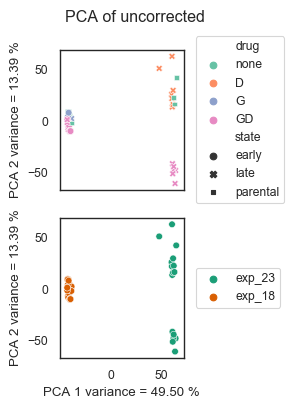

In [28]:
create_pca(merged_no_na, 'uncorrected', 'uncorrected')

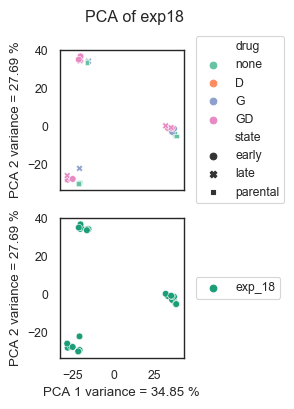

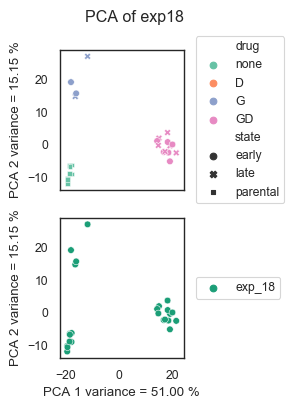

In [29]:
create_pca(exp_18_for_plot, 'exp18', 'exp18', styles=styles_18)
create_pca(exp_18_corrected, 'exp18', 'exp18', styles=styles_18)

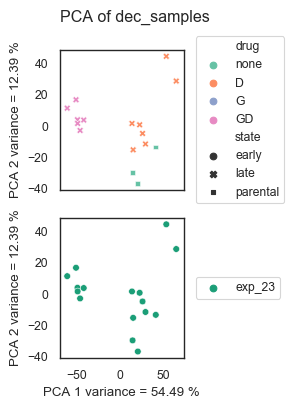

In [30]:
create_pca(do_table_for_plot, 'dec_samples', 'dec_samples', styles=dec_only_styles)

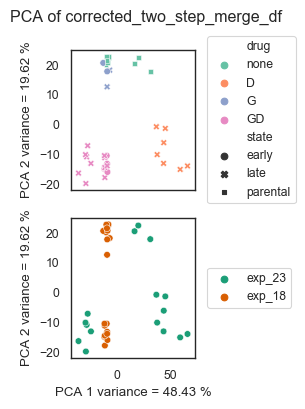

In [31]:
create_pca(two_step_merge_df, 'corrected_two_step_merge_df', 'corrected_two_step_merge_df')

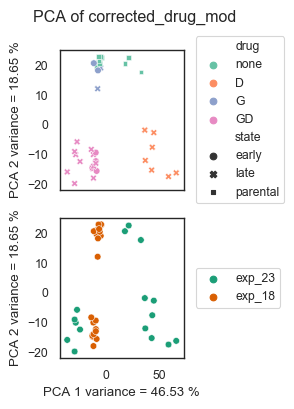

In [32]:
create_pca(df_corrected_drug_mod, 'corrected_drug_mod', 'corrected_drug_mod')

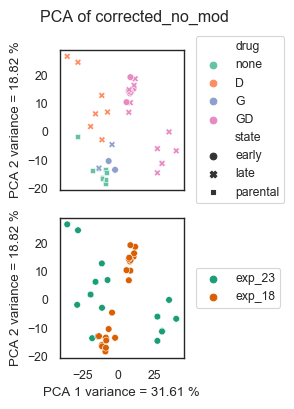

In [33]:
create_pca(df_corrected_no_mod, 'corrected_no_mod', 'corrected_no_mod')

In [34]:
#create a color palette with the same number of colors as unique values in the Source column
network_pal = sns.color_palette('Set3', len(styles.drug.unique()), as_cmap=False)
# network_pal = ['green', 'red', 'blue', 'pink', 'orange', 'yellow']
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(styles.drug.unique(), network_pal))


#map the colors to the series. Now we have a list of colors the same
#length as our dataframe, where unique values are mapped to the same color
network_colors = pd.Series(styles.drug).map(network_lut)
network_colors.index = merged_no_na.columns

#create a color palette with the same number of colors as unique values in the Source column
network_pal2 = sns.color_palette('Dark2', len(styles.experiment.unique()), as_cmap=False)
# network_pal = ['green', 'red', 'blue', 'pink', 'orange', 'yellow']
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut2 = dict(zip(styles.experiment.unique(), network_pal2))


#map the colors to the series. Now we have a list of colors the same
#length as our dataframe, where unique values are mapped to the same color
network_colors2 = pd.Series(styles.experiment).map(network_lut2)
network_colors2.index = merged_no_na.columns
colors = pd.DataFrame([network_colors2, network_colors])

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)



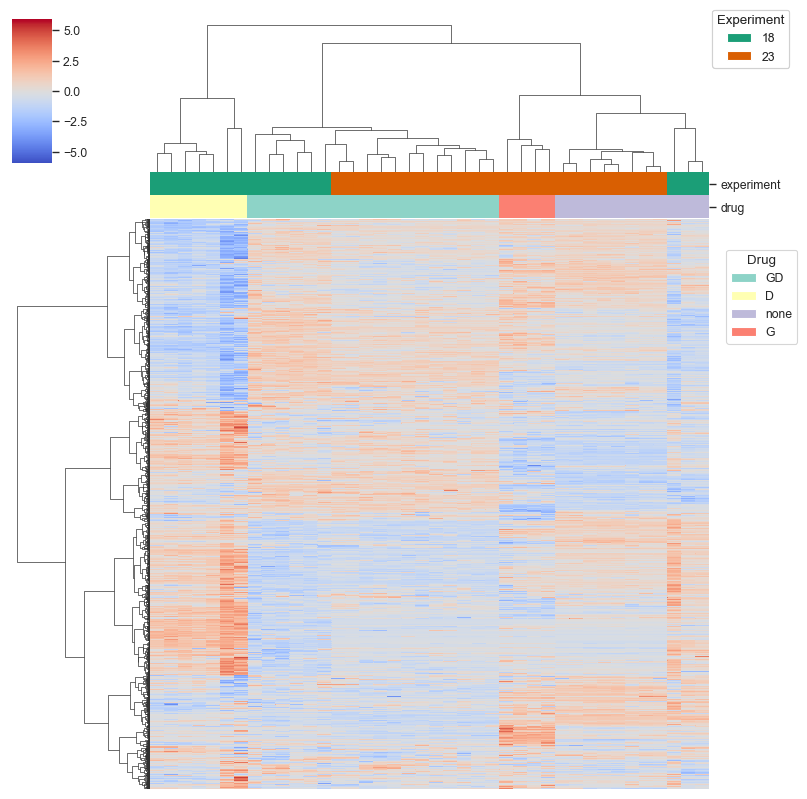

In [35]:
sns.clustermap(
    two_step_merge_df,
    xticklabels=False, 
    yticklabels=False, 
    row_cluster=True,
    cmap='coolwarm',
    z_score=0, 
    col_colors=colors.T,
    method='ward',
    figsize=(8,8)
)

handles = [Patch(facecolor=network_lut[name]) for name in network_lut]
legend1= plt.legend(handles, network_lut, title='Drug',
           bbox_to_anchor=(1.01, .7), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=network_lut2[name]) for name in network_lut2]
legend2 = plt.legend(
    handles2, 
    ['18', '23'],
    title='Experiment',
    bbox_to_anchor=(1., 1.),
    bbox_transform=plt.gcf().transFigure,
    loc='upper right'
)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
# plt.tight_layout()
plt.savefig('heatmap_corrected_clustered.png', bbox_inches='tight', dpi=300, bbox_extra_artists=(legend1, legend2))
plt.savefig('heatmap_corrected_clustered.pdf', bbox_inches='tight', dpi=300, bbox_extra_artists=(legend1, legend2))

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)



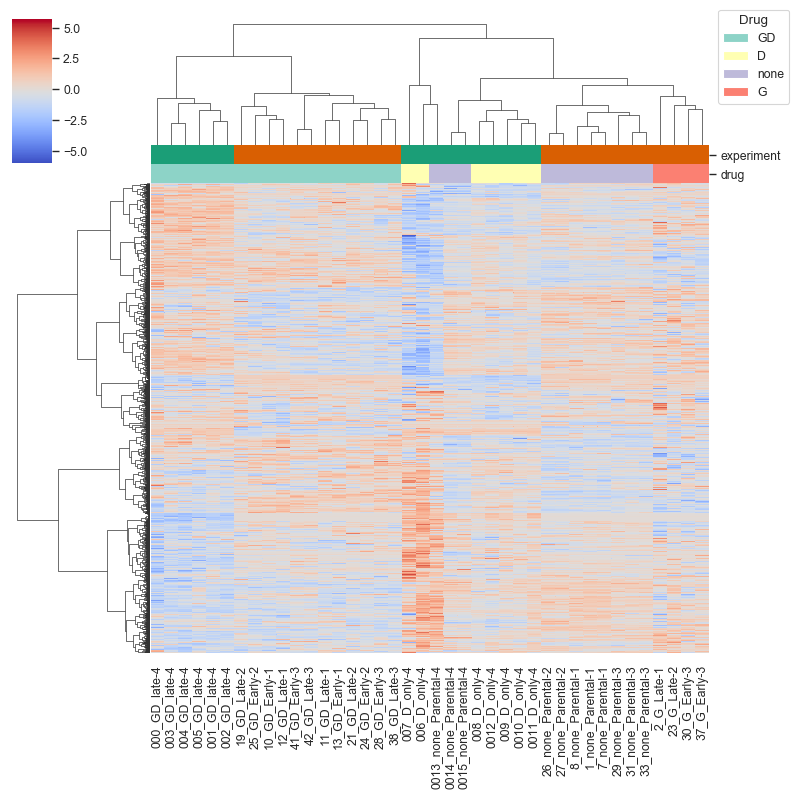

In [36]:
sns.clustermap(
    df_corrected_no_mod,
    xticklabels=True, 
    yticklabels=False, 
    row_cluster=True,
    cmap='coolwarm',
    z_score=0, 
    col_colors=colors.T,
    method='ward',
    figsize=(8, 8)
)

handles = [Patch(facecolor=network_lut[name]) for name in network_lut]
plt.legend(handles, network_lut, title='Drug',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
# 
# handles2 = [Patch(facecolor=network_lut2[name]) for name in network_lut2]
# plt.legend(handles2, network_lut2, title='Exp',
#            bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

# plt.savefig('corrected_clustered_no_mod1.png', bbox_inches='tight')

In [37]:
df_corrected_drug_mod.to_csv('global_proteomics_matrix.csv')

### Load in diff. expression 

In [38]:
import pandas as pd

## Phosphoproteomics

In [39]:
dec_only_phospho_id = syn.get('syn61910985').path#'data/exp23_phospho_raw_intensity_crosstab.txt'
dec_phospho_meta_id = syn.get('syn61910986').path #'data/exp23_phospho_raw_metadata.txt'

do_phospho_meta = pd.read_csv(dec_phospho_meta_id, delimiter='\t')
do_phospho_table = pd.read_csv(dec_only_phospho_id, delimiter='\t')


do_phospho_meta.reset_index(names='name_index',inplace=True)
do_phospho_meta.loc[do_phospho_meta.sample_name.str.startswith('L'), 'TS_'] = 'GD_late'
do_phospho_meta.loc[do_phospho_meta.sample_name.str.startswith('molm14'), 'TS_'] = 'none_Parental'
do_phospho_meta.loc[do_phospho_meta.sample_name.str.startswith('molm/dec'), 'TS_'] = 'D_only'
col_dict2 = do_phospho_meta[['name_index', 'TS_']].set_index('name_index').to_dict()['TS_']

do_phospho_table.rename(columns=col_dict2, inplace=True)
do_phospho_table.columns = [f'{i}_{j}' for i,j in enumerate(do_phospho_table.columns)]
do_phospho_table

,0_D_only,1_D_only,2_GD_late,3_GD_late,4_none_Parental,5_D_only,6_GD_late,7_none_Parental,8_GD_late,9_D_only,10_D_only,11_D_only,12_D_only,13_GD_late,14_GD_late,15_none_Parental
AAAS-S495s,-0.435257,-0.534147,-0.882029,-0.892135,-0.520144,-0.343265,-0.806770,0.152892,-0.960845,-0.541256,-0.047260,-0.787058,-0.486933,-0.835242,-0.784332,-0.493288
PPAN-S347s,1.211896,1.278203,0.918119,0.824122,1.284884,0.719528,0.465512,0.682211,0.402677,1.275312,0.770980,0.419089,-1.046531,1.108622,0.630377,1.591132
ZNF592-S361s,-0.321901,0.062746,0.565424,0.227055,0.254933,0.554913,0.392982,0.833199,0.478334,-0.041141,0.838029,0.009567,-0.233059,0.231981,0.499821,0.098772
CHD8-S1995sT2014t,-1.617953,-1.543485,0.999738,0.877841,-1.846709,-1.013607,1.290229,-0.619994,0.883578,-1.999638,-0.172283,-2.164810,-3.025889,0.584998,0.870820,-1.752664
OSER1-S82sS84s,0.127734,0.011854,1.158644,1.001828,0.576060,0.087725,1.183417,0.071747,1.039763,-0.206389,0.177983,0.046943,-0.684254,1.111450,0.960958,0.090091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DYNC1LI2-S446s,-2.905310,-2.843964,-0.821550,-1.465584,-2.068331,-3.345656,-0.632189,-3.094646,-1.220388,-3.004134,-3.047375,-3.097063,-3.051691,-0.838281,-1.454815,-2.102463
DYNC1LI1-S421s,-1.051055,-0.917388,0.138262,0.424097,-0.558158,-1.349641,0.609033,-0.678690,0.115727,-1.310173,-1.772917,-1.647983,-2.110783,0.786396,0.416162,-0.566251
DYNC1LI1-S415s,-0.545750,-0.479524,0.537291,0.940951,0.630918,-0.675776,2.456592,-0.251088,0.815948,-0.721871,-0.719690,-0.188200,0.653913,1.220645,0.767087,1.183153
DYNC1LI1-S440s,-2.042298,-1.388571,-0.195156,-0.490245,-0.665678,-2.918974,-0.314805,-2.514699,-0.502070,-3.015664,-3.436360,-2.439066,-3.536196,-0.282635,-0.247021,-0.992074


In [60]:
# gv, gvd, gd samples
exp_18_meta_id_phospho =  syn.get('syn61911129').path#'data/exp18_phospho_raw_metadata.txt'
exp_18_id_phospho = syn.get('syn61915432').path##'data/exp18_phospho_raw_intensity_crosstab.txt' SARA CANNOT FIND SAME FILE ANYWHERE

##read in, remove GV conditions
exp_18_meta_phospho = pd.read_csv(exp_18_meta_id_phospho, delimiter='\t')
exp_18_meta_phospho = exp_18_meta_phospho.loc[-exp_18_meta_phospho['Treatment'].isin(['GV','GVD'])]
exp_18_phospho = pd.read_csv(exp_18_id_phospho, delimiter='\t')
exp_18_phospho = exp_18_phospho[[i for i in exp_18_phospho.columns if 'GV' not in i]]

exp_18_meta_phospho['TS_'] = exp_18_meta_phospho.Treatment + '_' +exp_18_meta_phospho.State + '-'+ exp_18_meta_phospho.Plex.astype(str)
# make a dictionary to rename columns of table to be the same as meta
exp_18_meta_phospho.reset_index(names='name_index',inplace=True)
exp_18_meta_phospho.dropna(subset=['Ligand'], inplace=True)

col_dict = exp_18_meta_phospho[['name_index', 'TS_']].set_index('name_index').to_dict()['TS_']

exp_18_phospho = exp_18_phospho[col_dict.keys()].copy()
exp_18_phospho.rename(columns=col_dict, inplace=True)
exp_18_phospho.columns = [f'{i}_{j}' for i,j in enumerate(exp_18_phospho.columns)]

In [61]:
exp_18_phospho
exp_18_meta_phospho


,name_index,Index,fullName,Ligand,State,Treatment,Plex,PrepOrder,Channel,sample_id,plex_channel,TS_
0,1 127N,2.0,MOLM14 Parental 2,none,Parental,none,1,2.0,127N,1 127N,1 127N,none_Parental-1
1,1 127C,6.0,"Late Gilteritinib Resistance MOLM14, Flask 8",FGF2,Late,G,1,3.0,127C,1 127C,1 127C,G_Late-1
3,1 130C,1.0,MOLM14 Parental 1,none,Parental,none,1,9.0,130C,1 130C,1 130C,none_Parental-1
4,1 131N,3.0,MOLM14 Parental 3,none,Parental,none,1,10.0,131N,1 131N,1 131N,none_Parental-1
5,1 132N,37.0,EARLY Gilteritinib +Decitabine Resistance MOLM...,FLT3,Early,GD,1,12.0,132N,1 132N,1 132N,GD_Early-1
6,1 132C,40.0,Late Gilteritinib +Decitabine Resistance MOLM1...,FGF2,Late,GD,1,13.0,132C,1 132C,1 132C,GD_Late-1
7,1 133N,43.0,Late Gilteritinib +Decitabine Resistance MOLM1...,FLT3,Late,GD,1,14.0,133N,1 133N,1 133N,GD_Late-1
8,1 133C,34.0,EARLY Gilteritinib +Decitabine Resistance MOLM...,FGF2,Early,GD,1,15.0,133C,1 133C,1 133C,GD_Early-1
10,2 129N,44.0,Late Gilteritinib +Decitabine Resistance MOLM1...,FLT3,Late,GD,2,21.0,129N,2 129N,2 129N,GD_Late-2
11,2 130N,41.0,Late Gilteritinib +Decitabine Resistance MOLM1...,FGF2,Late,GD,2,23.0,130N,2 130N,2 130N,GD_Late-2


In [62]:
cols = [i for i in exp_18_phospho.columns if 'Spontaneous' not in i]
len(cols)

24

In [63]:
e18_phospho = exp_18_phospho[cols].copy()
e18_phospho -= e18_phospho.median()
e18_phospho
styles_18

,name,batch,state,drug,experiment
16,none_Parental,1,parental,none,exp_18
17,G_Late,1,late,G,exp_18
18,none_Parental,1,parental,none,exp_18
19,none_Parental,1,parental,none,exp_18
20,GD_Early,1,early,GD,exp_18
21,GD_Late,1,late,GD,exp_18
22,GD_Late,1,late,GD,exp_18
23,GD_Early,1,early,GD,exp_18
24,GD_Late,2,late,GD,exp_18
25,GD_Late,2,late,GD,exp_18


In [64]:

e18_phospho_corrected = pycombat.pycombat(
    e18_phospho,
    batch=list(styles_18.batch),
    mod=list(styles_18.drug)
)

Found 3 batches.
Adjusting for 2 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [65]:
do_phospho_table_for_plot = do_phospho_table.copy()
do_phospho_table_for_plot -= do_phospho_table_for_plot.median()

two_step_merge_phopsho = pd.concat([do_phospho_table_for_plot, e18_phospho_corrected ], axis=1)
print(two_step_merge_phopsho.shape)
two_step_merge_phopsho.dropna(thresh=29, axis=0, inplace=True)
print(two_step_merge_phopsho.shape)

two_step_merge_phospho_df = pycombat.pycombat(
    two_step_merge_phopsho.fillna(0),
    batch=list(styles.experiment),
    mod=list(styles.drug)
)

(38584, 40)
(11029, 40)
Found 2 batches.
Adjusting for 3 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [66]:


one_step_merge_phopsho = pd.concat([do_phospho_table, e18_phospho ], axis=1)
print(one_step_merge_phopsho.shape)
one_step_merge_phopsho.dropna(thresh=29, axis=0, inplace=True)
print(one_step_merge_phopsho.shape)

one_step_merge_phopsho = one_step_merge_phopsho.copy()
one_step_merge_phopsho -= one_step_merge_phopsho.median()
one_step_merge_phopsho = one_step_merge_phopsho.fillna(0)

one_step_merge_phospho_df = pycombat.pycombat(
    one_step_merge_phopsho,
    batch=list(styles.batch),
    mod=list(styles.drug)
)

(38584, 40)
(11029, 40)
Found 4 batches.
Adjusting for 3 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [67]:
# save results used
one_step_merge_phopsho.to_csv('phospho_proteomics_matrix.csv')

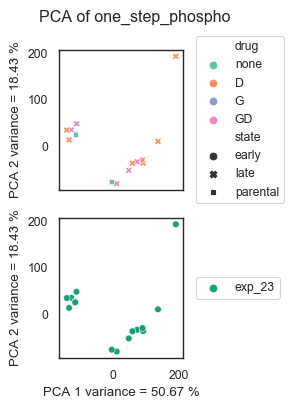

In [68]:
create_pca(do_phospho_table, 'phosphoproteomics after batch corrected', 'one_step_phospho', styles=dec_only_styles)

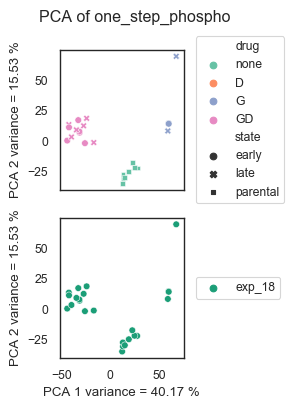

In [69]:
create_pca(e18_phospho_corrected, 'phosphoproteomics after batch corrected', 'one_step_phospho', styles=styles_18)

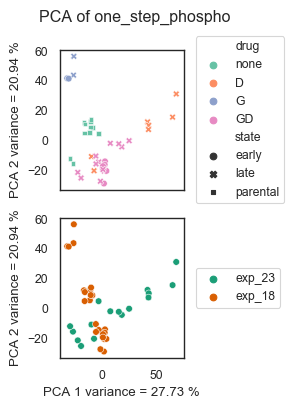

In [70]:
create_pca(one_step_merge_phospho_df, 'phosphoproteomics after batch corrected', 'one_step_phospho')

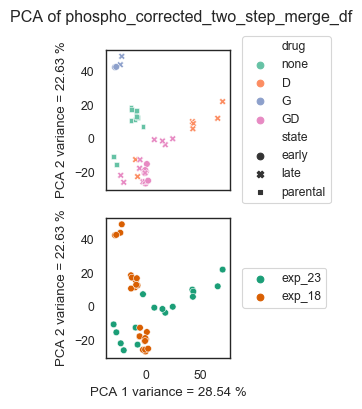

In [71]:
create_pca(two_step_merge_phospho_df, 'phosphoproteomics after batch corrected', 'phospho_corrected_two_step_merge_df')

In [72]:
#create a color palette with the same number of colors as unique values in the Source column
network_pal = sns.color_palette('Set3', len(styles.drug.unique()), as_cmap=False)
# network_pal = ['green', 'red', 'blue', 'pink', 'orange', 'yellow']
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(styles.drug.unique(), network_pal))


#map the colors to the series. Now we have a list of colors the same
#length as our dataframe, where unique values are mapped to the same color
network_colors = pd.Series(styles.drug).map(network_lut)
network_colors.index = two_step_merge.columns

#create a color palette with the same number of colors as unique values in the Source column
network_pal2 = sns.color_palette('Dark2', len(styles.experiment.unique()), as_cmap=False)
# network_pal = ['green', 'red', 'blue', 'pink', 'orange', 'yellow']
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut2 = dict(zip(styles.experiment.unique(), network_pal2))


#map the colors to the series. Now we have a list of colors the same
#length as our dataframe, where unique values are mapped to the same color
network_colors2 = pd.Series(styles.experiment).map(network_lut2)
network_colors2.index = two_step_merge.columns
colors = pd.DataFrame([network_colors2, network_colors])

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

[WARNING] /Users/gosl241/.pyenv/versions/3.8/envs/magine/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)



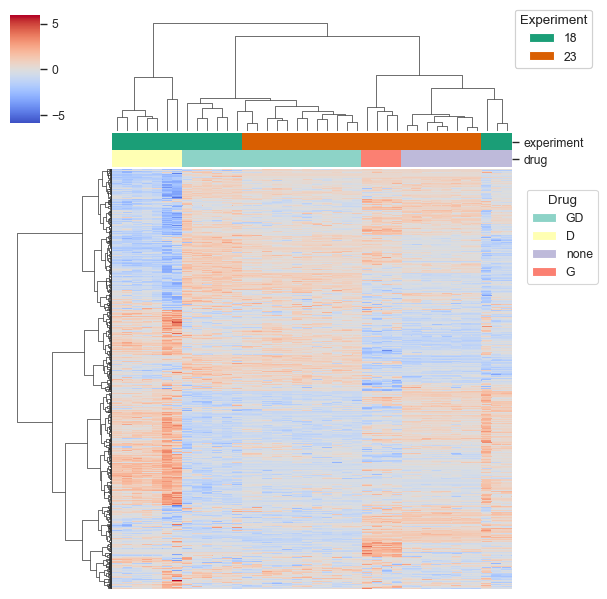

In [73]:
sns.clustermap(
    two_step_merge_df,
    xticklabels=False, 
    yticklabels=False, 
    row_cluster=True,
    cmap='coolwarm',
    z_score=0, 
    col_colors=colors.T,
    method='ward',
    figsize=(6,6)
)

handles = [Patch(facecolor=network_lut[name]) for name in network_lut]
legend1= plt.legend(handles, network_lut, title='Drug',
           bbox_to_anchor=(1.01, .7), bbox_transform=plt.gcf().transFigure, loc='upper right')

handles2 = [Patch(facecolor=network_lut2[name]) for name in network_lut2]
legend2 = plt.legend(
    handles2, 
    ['18', '23'],
    title='Experiment',
    bbox_to_anchor=(1., 1.),
    bbox_transform=plt.gcf().transFigure,
    loc='upper right'
)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
# plt.tight_layout()
plt.savefig('heatmap_phospho_corrected_clustered.png', bbox_inches='tight', dpi=300, bbox_extra_artists=(legend1, legend2))